# <span style="color:blue"> Laboratorio di simulazione numerica </span>
## <span style="color:green">  Esercitazione numero 5</span>

In questo esercizio si va a campionare il modulo quadro della funzione d'onda dell'idrogeno nello stato fondamentale  $|\Psi_{1,0,0}(x,y,z)|^2$ e il primo stato eccitato $|\Psi_{2,1,0}(x,y,z)|^2$ sfruttando l'algoritmo di Metropolis.

Le funzioni d'onda che ci interessano hanno come forma analitica $$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
e
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$


Da queste si possono ricavare i valori medi della distanza degli elettroni dal nucleo che valgono 


$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$

L'algoritmo di Metropolis è capace di campionare una distribuzione di probabilità partendo da una probbilità di transizione  $T(\vec{x}|\vec{y})$ che deve essere simmetrica, ovvero 
$$T(\vec{x}|\vec{y})=T(\vec{y}|\vec{x})$$


In questo caso verranno usate la distribuzione uniforme $U[y-\delta,y+\delta]$ e la distribuzione Gaussiana $\mathcal{N}(y,\delta^2)$. I parametri $\delta$ sono stati scelti in modo tale che l'accettazione dell'algoritmo di Metropolis fosse il più possibile vicino al $50\%$.In questo esercizio è stato usata come unità di misura delle lunghezze il raggio di Bohr $a_0$.

### distribuzione uniforme

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import statistics as stat
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

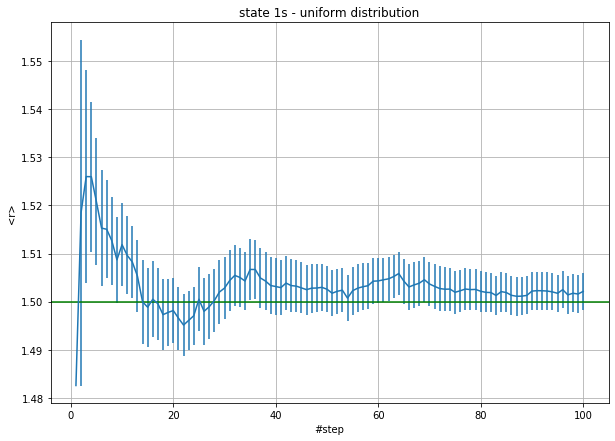

In [4]:
fig = plt.figure(figsize=(10,7))
x, f1, error1 = np.loadtxt("psi1s_unif.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,f1,yerr=error1)
plt.axhline(y=1.5, color='g', linestyle='-')
plt.xlabel('#step')
plt.ylabel('<r>')
plt.title('state 1s - uniform distribution')
plt.grid(True)
plt.show()

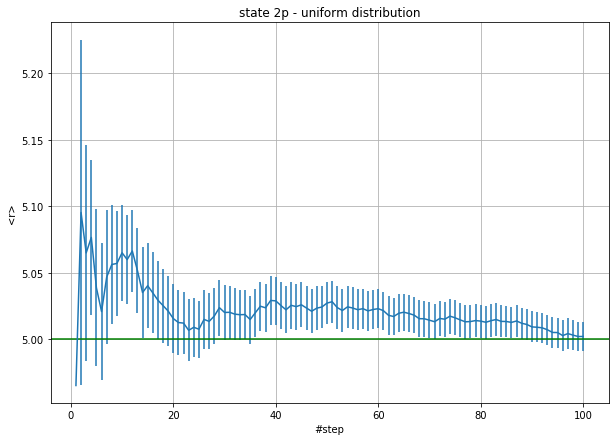

In [5]:
fig = plt.figure(figsize=(10,7))
x, f, error3 = np.loadtxt("psi2p_unif.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,f,yerr=error3)
plt.axhline(y=5, color='g', linestyle='-')
plt.xlabel('#step')
plt.ylabel('<r>')
plt.title('state 2p - uniform distribution')
plt.grid(True)
plt.show()

Nei primi due grafici sono riportati il calcolo di $
\left\langle r \right\rangle_{\Psi_{1,0,0}}$ e $
\left\langle r \right\rangle_{\Psi_{2,1,0}}$ con i relativi errori che sono in accordo con i valori esatti indicati con la linea orizzontale verde.

Nel grafico sottostante si osserva cosa succede se si fa partire l'algoritmo di Metropolis da una posizione molto lontana dall'origine: i punti tenderanno ad avvicinarsi all'origine dove la probabilità aumenta e quindi il tempo in cui si raggiunge una posizione di equilibrio è grande rispetto al caso in cui si parte vicino all'origine.

Il punto iniziale ha coordinate $(0,0,0)$ nello stato 1s, nello stato 2p invece (1,1,1) in quanto l'origine ha probabilità nulla. Dopo aver scelto il punto iniziale si va ad equilibrare il sistema compiendo 100 step di Metropolis. 

I valori delle distanze vengono trattati usando il metodo a blocchi per ottenerne la media e l'errore.
Dal momento che i punti vengono generari con l'algoritmo di Metropolis sono correlati tra di loro e quindi non si potrebbe usare il teorema del limite centrale, l'unico modo per risolvere il problema è considerare un numero di step per blocco molto alto in modo tale da considerare i singoli blocchi scorrelati tra di loro.
In questo caso ci sono $100$ blocchi contenenti $10^4$ elementi.

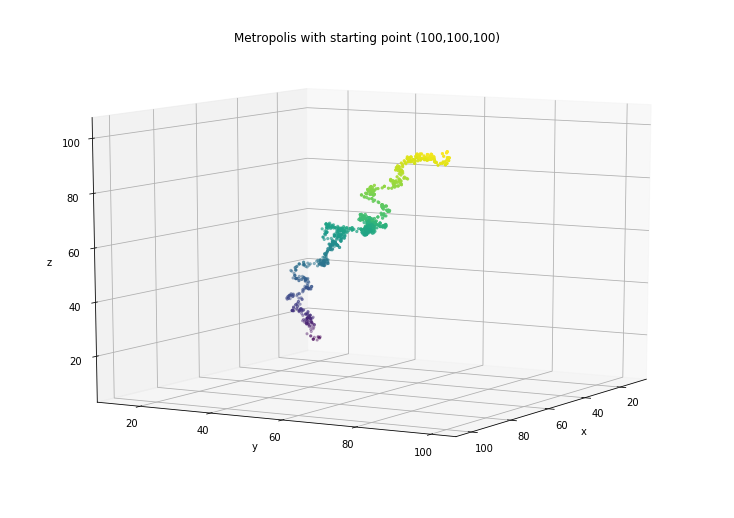

In [6]:
from scipy.optimize import curve_fit


def f(x,a):  # defining the fitting function
    return a*np.sqrt(x)

x,y,z = np.loadtxt("Positions100.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

fig = plt.figure(figsize=(10,7))
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

plt.title('Metropolis with starting point (100,100,100)')
plt.show()



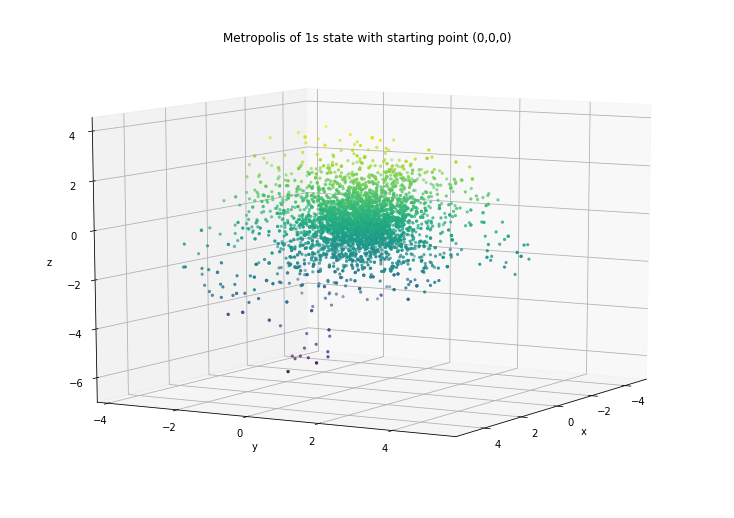

In [7]:
x,y,z = np.loadtxt("Positions0.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

fig = plt.figure(figsize=(10,7))
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

plt.title('Metropolis of 1s state with starting point (0,0,0)')

plt.show()


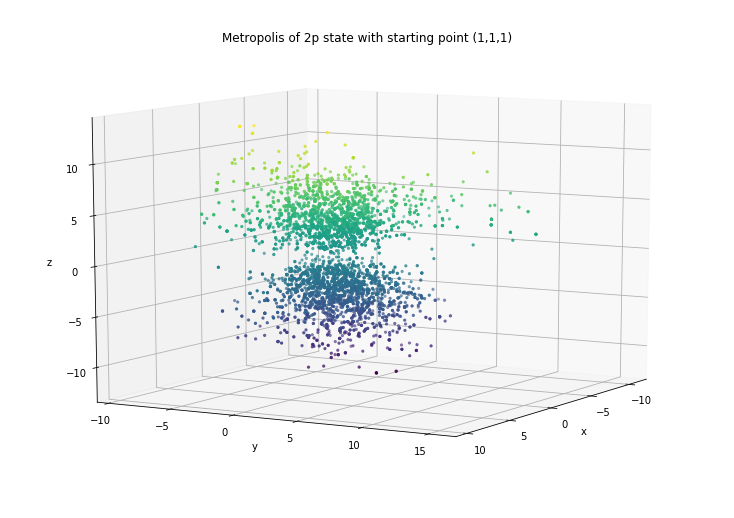

In [8]:
x,y,z = np.loadtxt("Positions0-2p.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

fig = plt.figure(figsize=(10,7))
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel('x')



ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

plt.title('Metropolis of 2p state with starting point (1,1,1)')
plt.show()


### distribuzione Gaussiana multivariata

Si procede in modo analogo a quanto fatto precedentemente ma considerando una Gaussiana multivariata come probabilità di transizione. Dalla teoria segue che l'algoritmo di Metropolis è indipendente dalla scelta della funzione di transizione, infatti nei due grafici seguenti si osserva una convergenza ai valori esatti e imponendo anche in questo caso la regola del $50\%$ si osserva che gli errori sono molto simili ai casi precedenti.

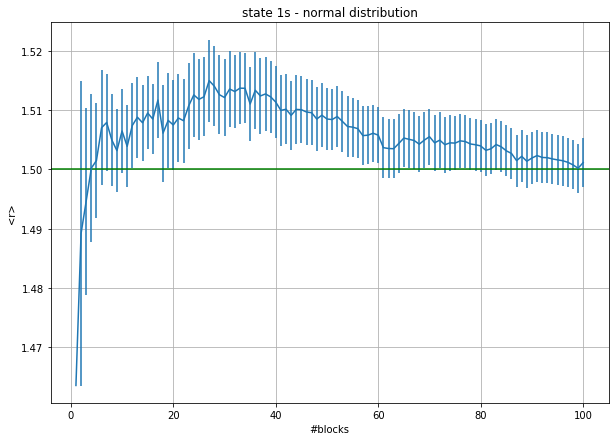

In [9]:
fig = plt.figure(figsize=(10,7))
x, f2, error2 = np.loadtxt("psi1s_gauss.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,f2,yerr=error2)
plt.axhline(y=1.5, color='g', linestyle='-')
plt.xlabel('#blocks')
plt.ylabel('<r>')
plt.grid(True)
plt.title('state 1s - normal distribution')
plt.show()

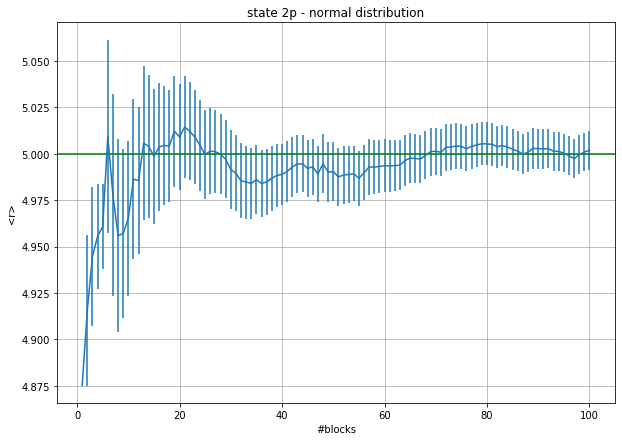

In [10]:
fig = plt.figure(figsize=(10,7))
x, f, error4 = np.loadtxt("psi2p_gauss.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,f,yerr=error4)
plt.axhline(y=5, color='g', linestyle='-')
plt.xlabel('#blocks')
plt.ylabel('<r>')
plt.grid(True)
plt.title('state 2p - normal distribution')
plt.show()

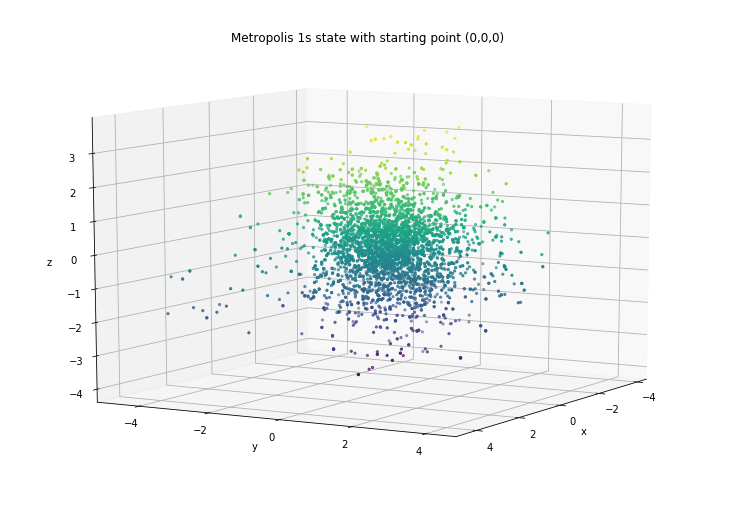

In [11]:
x,y,z = np.loadtxt("Positions0G.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

fig = plt.figure(figsize=(10,7))
ax = Axes3D(fig)
ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

plt.title('Metropolis 1s state with starting point (0,0,0)')
plt.show()


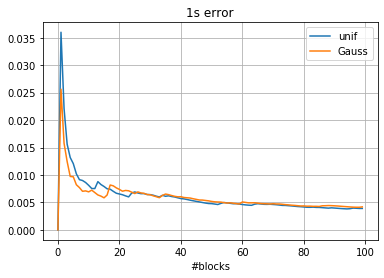

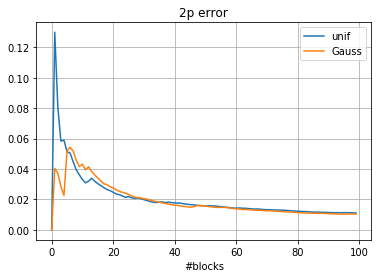

In [12]:
plt.plot(error1,label='unif')
plt.plot(error2,label='Gauss')
plt.title('1s error')
plt.xlabel('#blocks')
plt.grid(True)
plt.legend()
plt.show()

plt.plot(error3,label='unif')
plt.plot(error4,label='Gauss')
plt.title('2p error')
plt.xlabel('#blocks')
plt.legend()
plt.grid(True)
plt.show()